In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
!pip install unidecode

In [9]:
import pandas as pd
from utils import *

ModuleNotFoundError: No module named 'unidecode'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.svm import SVC, LinearSVC

# Load data

In [ ]:
df = pd.read_csv('ds/train.csv', sep='|')
df.columns = [i.lower().replace(" ",'_') for i in df.columns]

query_df = pd.read_csv('ds/train_serp.csv', sep='|')
query_df.columns = [i.lower().replace(" ",'_') for i in query_df.columns]

df = pd.merge(df, query_df, on = 'query_id')

with open("ds/category_list") as f:
    label2idx = eval(f.read())

idx2label = {v:k for k,v in label2idx.items()}

In [ ]:
test_df = pd.read_csv("ds/test.csv", sep='|')
test_df.columns = [i.lower().replace(" ",'_') for i in test_df.columns]

test_query_df = pd.read_csv('ds/test_serp.csv', sep='|')
test_query_df.columns = [i.lower().replace(" ",'_') for i in test_query_df.columns]

test_df = pd.merge(test_df, test_query_df, on = 'query_id')

In [3]:
df.fillna('NaN',inplace=True)

NameError: name 'df' is not defined

In [4]:
test_df.fillna("NaN", inplace=True)

NameError: name 'test_df' is not defined

In [5]:
df['class_name'] = df.class_label.map(idx2label)

NameError: name 'df' is not defined

In [6]:
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(df, test_size=0.2, random_state = 1)

NameError: name 'df' is not defined

# Experiments

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
from collections import defaultdict
results = defaultdict(list)

## Default query

In [14]:
pipeline = Pipeline([
('column_selection', ColumnSelector('query')),
('clean', CleanTextField()),
('vectorizer', TfidfVectorizer())
])

X_train = pipeline.fit_transform(train_df)
y_train = train_df['class_label']
X_valid = pipeline.transform(valid_df)
y_valid = valid_df['class_label']
clf = SVC()
clf.fit(X_train, y_train)
valid_preds = clf.predict(X_valid)
eval_result = scoring(valid_df, valid_preds)
plot_result(eval_result,f'Default Query')
eval_result['model'] = clf
eval_result['pipeline'] = pipeline
results['default_query'] = eval_result



NameError: name 'i' is not defined

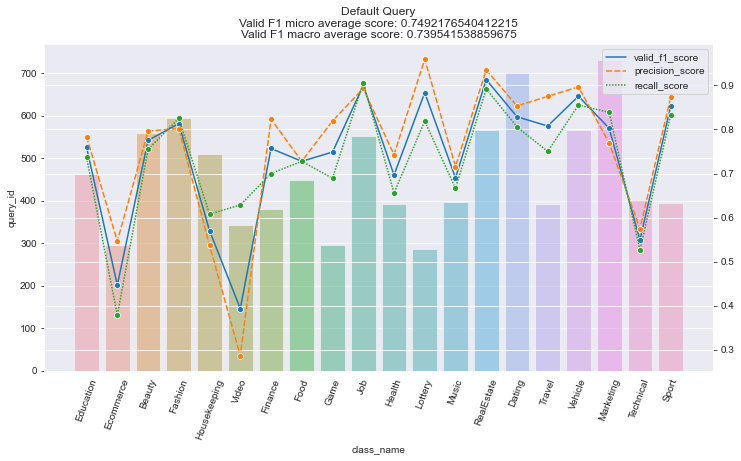

## Lowercase query

Training....
Evaluating....


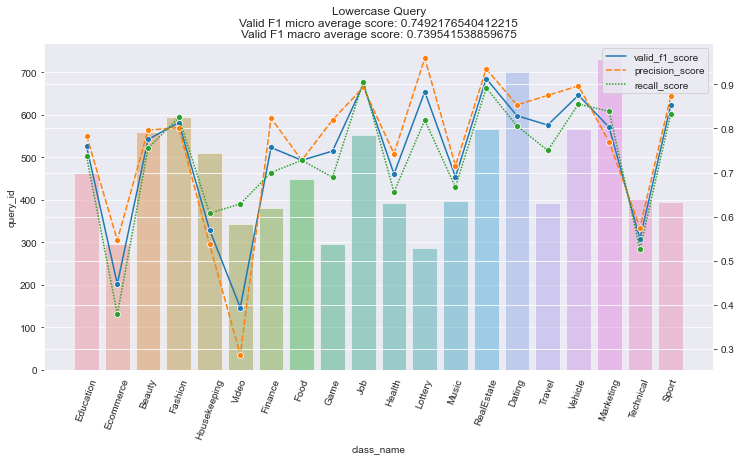

In [16]:
pipeline = Pipeline([
('column_selection', ColumnSelector('query')),
('to_lowercase', ToLowercase()),
('clean', CleanTextField()),
('vectorizer', TfidfVectorizer())
])

X_train = pipeline.fit_transform(train_df)
y_train = train_df['class_label']
X_valid = pipeline.transform(valid_df)
y_valid = valid_df['class_label']
clf = SVC()
print("Training....")
clf.fit(X_train, y_train)
print("Evaluating....")
valid_preds = clf.predict(X_valid)
eval_result = scoring(valid_df, valid_preds)
plot_result(eval_result,f'Lowercase Query')
results['lowercase_query'].append(eval_result)


## Query with tone removal

Training...


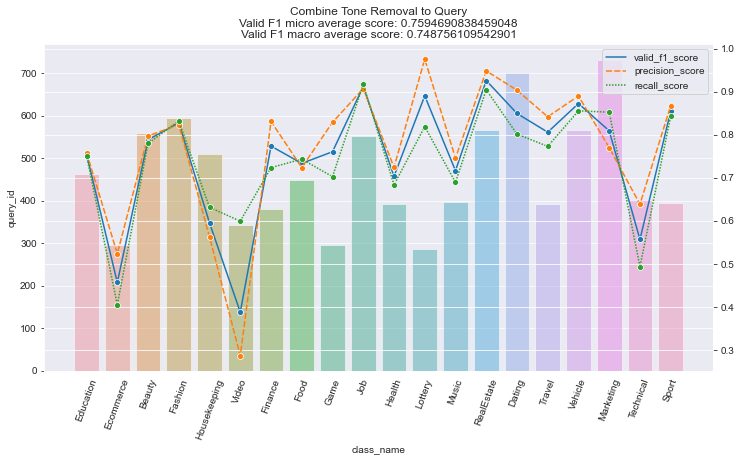

In [14]:
pipeline_1 = Pipeline([
('column_selection', ColumnSelector('query')),
('tone_removal', ToneRemoval()),
('clean', CleanTextField()),
])
X_train1 = pipeline_1.fit_transform(train_df)
y_train1 = train_df['class_label']

pipeline_2= Pipeline([
('column_selection', ColumnSelector('query')),
#     ('tone_removal', ToneRemoval()),
('clean', CleanTextField()),
])
X_train2 = pipeline_2.fit_transform(train_df)
y_train2 = train_df['class_label']
X_train = pd.concat([X_train1, X_train2])
y_train = pd.concat([y_train1, y_train2])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
    
X_valid = pipeline_2.transform(valid_df)
X_valid = vectorizer.transform(X_valid)
y_valid = valid_df['class_label']
clf = SVC()
print("Training...")
clf.fit(X_train, y_train)
valid_preds = clf.predict(X_valid)
eval_result = scoring(valid_df, valid_preds)
plot_result(eval_result,f'Combine Tone Removal to Query')
eval_result['model'] = clf
eval_result['pipeline'] = [pipeline_2, vectorizer]

results['query'] = eval_result


## Title combine with tone removal and take lowercase

Training...


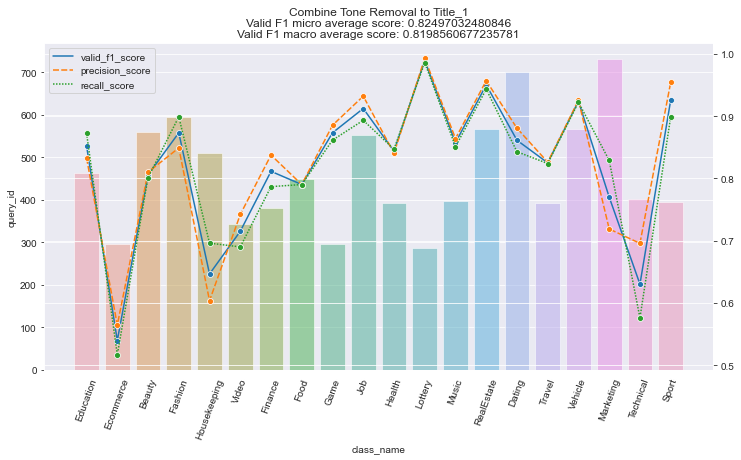

Training...


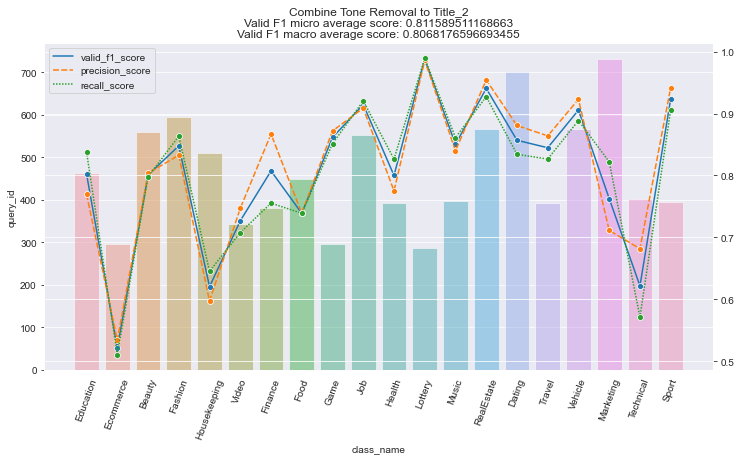

Training...


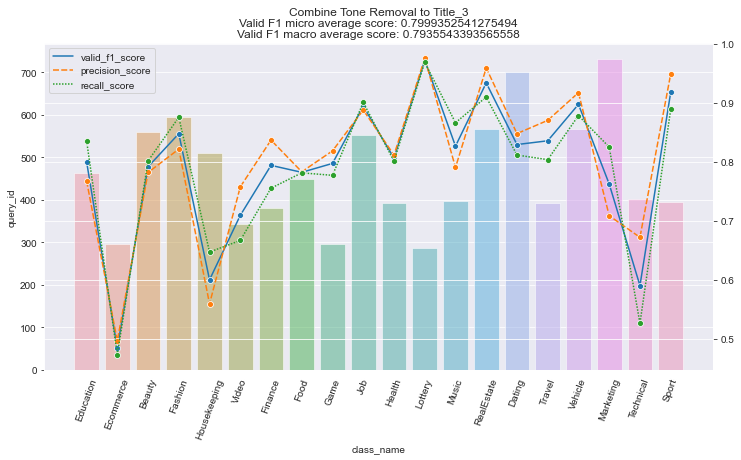

In [15]:
for i in range(1,4):
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']

    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),

    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
b    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Combine Tone Removal to Title_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'title_{i}'] = eval_result


## Title with tokenizer


In [19]:
from utils import Tokenizer

Training...


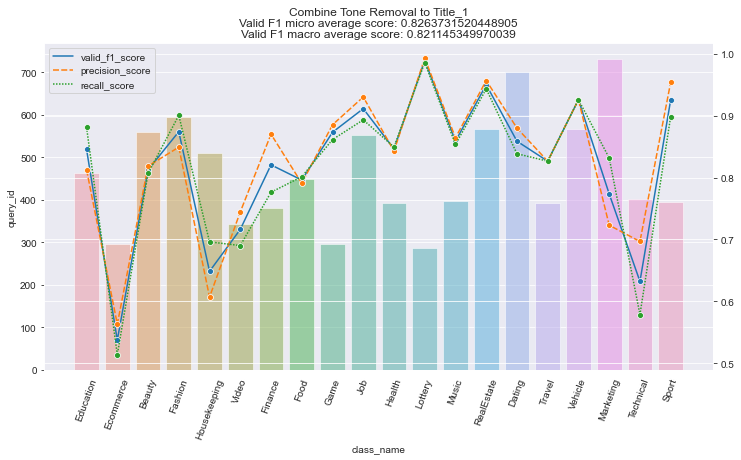

In [20]:
for i in range(1,4):
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']

    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Combine Tone Removal to Title_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'tokenized_title_{i}'] = eval_result
    break

## Title with complex tokenizer

In [22]:
from utils import TokenizerWithComplex

Training...


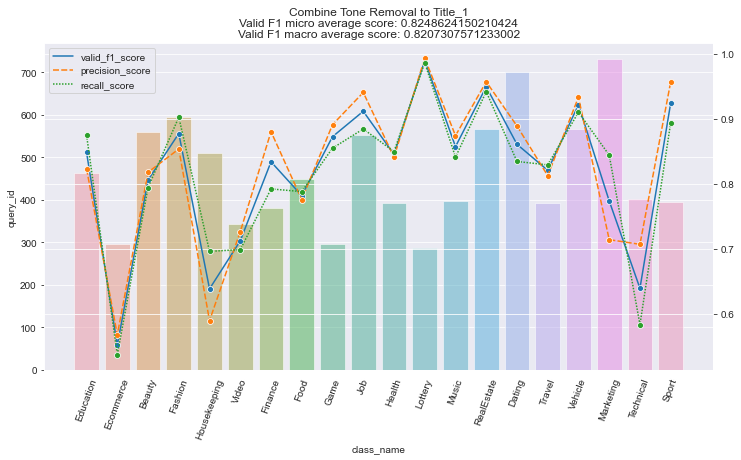

In [23]:
for i in range(1,4):
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', TokenizerWithComplex()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']

    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', TokenizerWithComplex()),
    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Combine Tone Removal to Title_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'tokenized_title_{i}'] = eval_result
    break

## Title with tf-idf min occur = 5

Training...


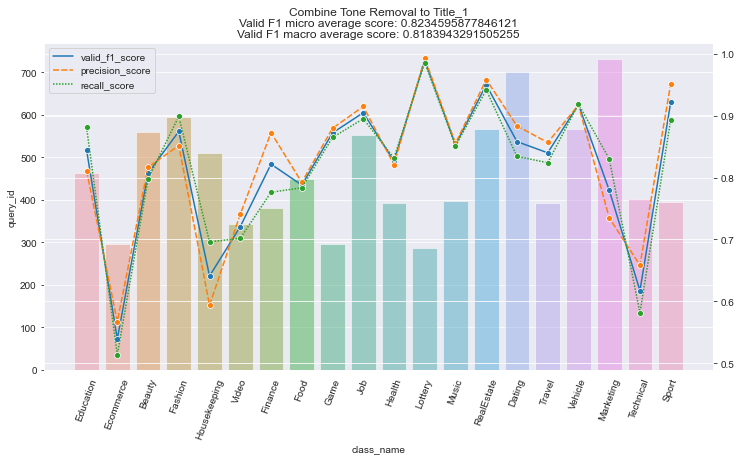

In [24]:
for i in range(1,4):
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']

    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer(min_df=5)
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Combine Tone Removal to Title_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'tokenized_title_{i}'] = eval_result
    break

## Title with tf-idf min occur = 2

Training...


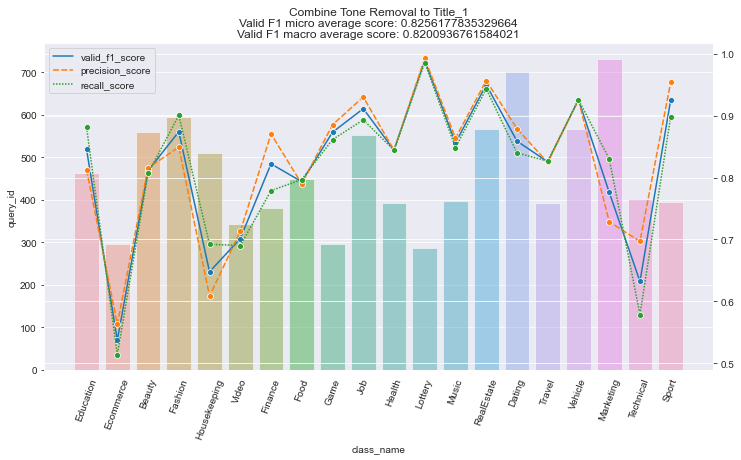

In [25]:
for i in range(1,4):
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']

    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer(min_df=2)
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Combine Tone Removal to Title_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'tokenized_title_{i}'] = eval_result
    break

## Tuning C for LinearSVC for query data

Training with C= 0.1


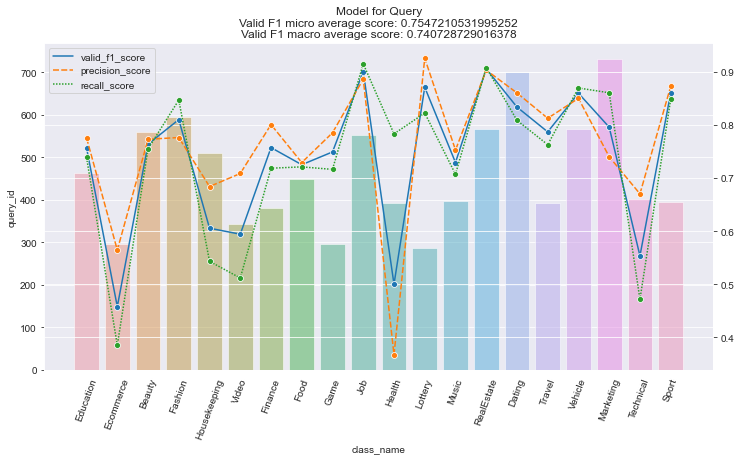

Training with C= 0.2


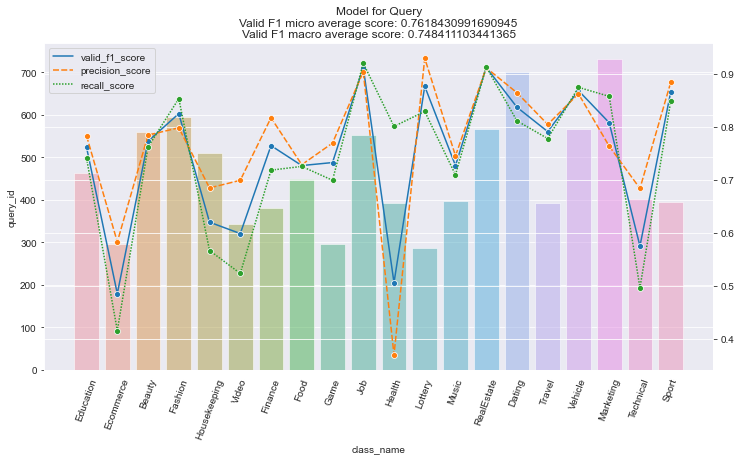

Training with C= 0.5


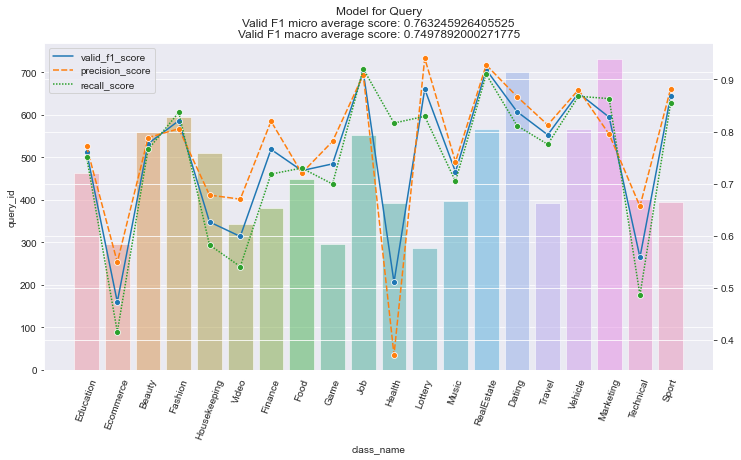

Training with C= 1


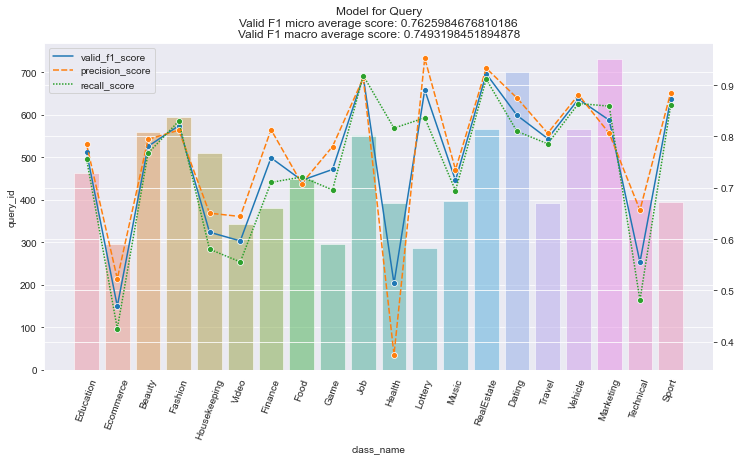

Training with C= 2


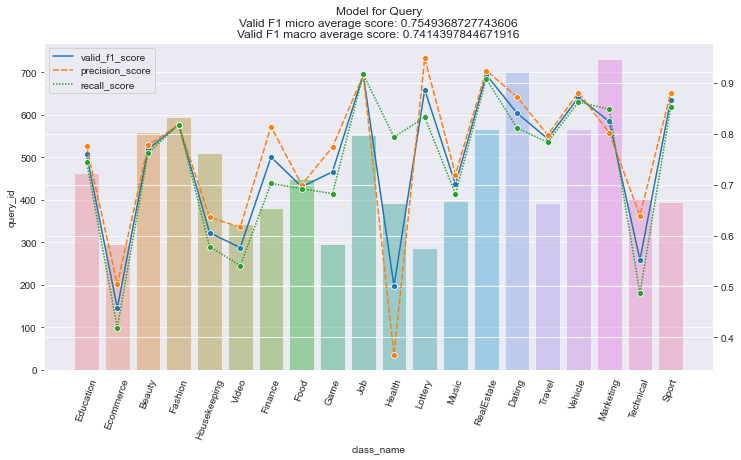

Training with C= 5


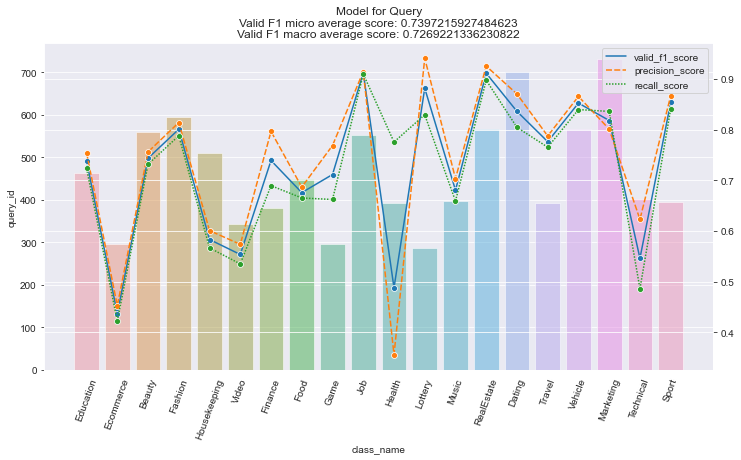

In [15]:
pipeline_1 = Pipeline([
('column_selection', ColumnSelector(f'query')),
('tone_removal', ToneRemoval()),
('tag_removal', TagRemoval()),
('quote_removal', QuoteRemoval()),
('to_lowercase', ToLowercase()),
('tokenize', Tokenizer()),
('clean', CleanTextField()),
])
X_train1 = pipeline_1.fit_transform(train_df)
y_train1 = train_df['class_label']
pipeline_2= Pipeline([
('column_selection', ColumnSelector(f'query')),
#     ('tone_removal', ToneRemoval()),
('tag_removal', TagRemoval()),
('quote_removal', QuoteRemoval()),
('to_lowercase', ToLowercase()),
('tokenize', Tokenizer()),
('clean', CleanTextField()),
])
X_train2 = pipeline_2.fit_transform(train_df)
y_train2 = train_df['class_label']
X_train = pd.concat([X_train1, X_train2])
y_train = pd.concat([y_train1, y_train2])
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3)
X_train = vectorizer.fit_transform(X_train)

X_valid = pipeline_2.transform(valid_df)
X_valid = vectorizer.transform(X_valid)
y_valid = valid_df['class_label']
for c in [0.1, 0.2, 0.5, 1, 2, 5]:
    clf = LinearSVC(C=c)
    print("Training with C=",c)
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Model for Query')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'query'] = eval_result


## Final model for query

Training...


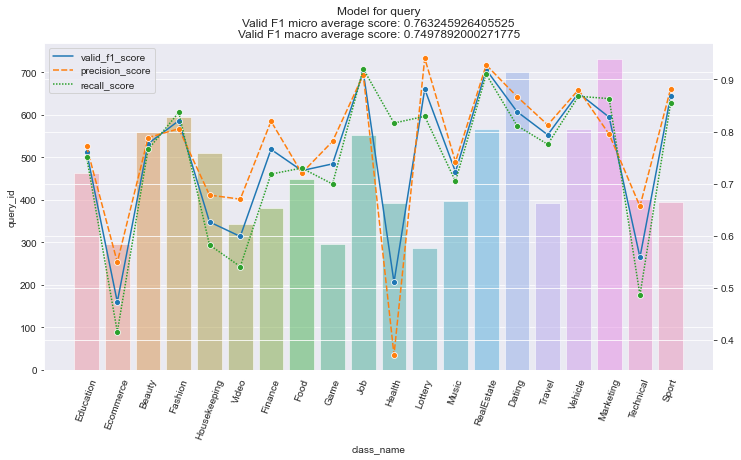

In [18]:
pipeline_1 = Pipeline([
('column_selection', ColumnSelector(f'query')),
('tone_removal', ToneRemoval()),
('tag_removal', TagRemoval()),
('quote_removal', QuoteRemoval()),
('to_lowercase', ToLowercase()),
('tokenize', Tokenizer()),
('clean', CleanTextField()),
])
X_train1 = pipeline_1.fit_transform(train_df)
y_train1 = train_df['class_label']
pipeline_2= Pipeline([
('column_selection', ColumnSelector(f'query')),
#     ('tone_removal', ToneRemoval()),
('tag_removal', TagRemoval()),
('quote_removal', QuoteRemoval()),
('to_lowercase', ToLowercase()),
('tokenize', Tokenizer()),
('clean', CleanTextField()),
])
X_train2 = pipeline_2.fit_transform(train_df)
y_train2 = train_df['class_label']
X_train = pd.concat([X_train1, X_train2])
y_train = pd.concat([y_train1, y_train2])
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3)
X_train = vectorizer.fit_transform(X_train)

X_valid = pipeline_2.transform(valid_df)
X_valid = vectorizer.transform(X_valid)
y_valid = valid_df['class_label']
clf = LinearSVC(C=0.5)
print("Training...")
clf.fit(X_train, y_train)
valid_preds = clf.predict(X_valid)
eval_result = scoring(valid_df, valid_preds)
plot_result(eval_result,f'Model for query')
eval_result['model'] = clf
eval_result['pipeline'] = [pipeline_2, vectorizer]
results[f'query'] = eval_result


## Final Model for title

Training...


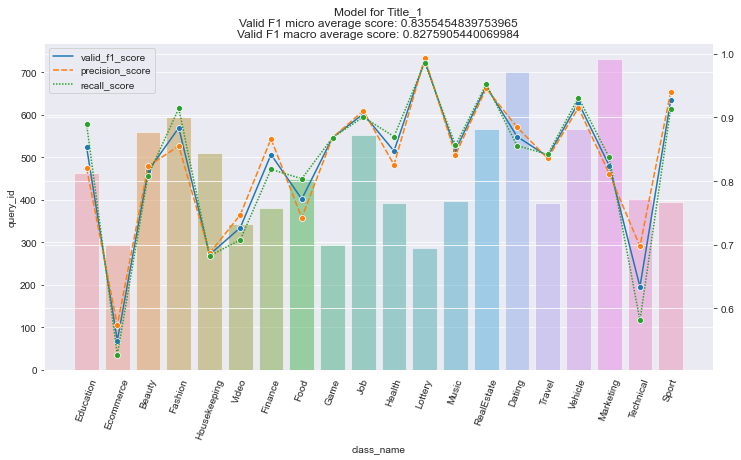

Training...


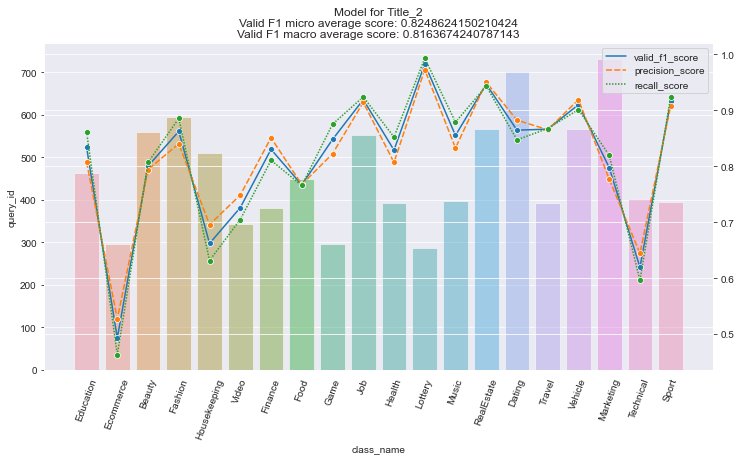

Training...


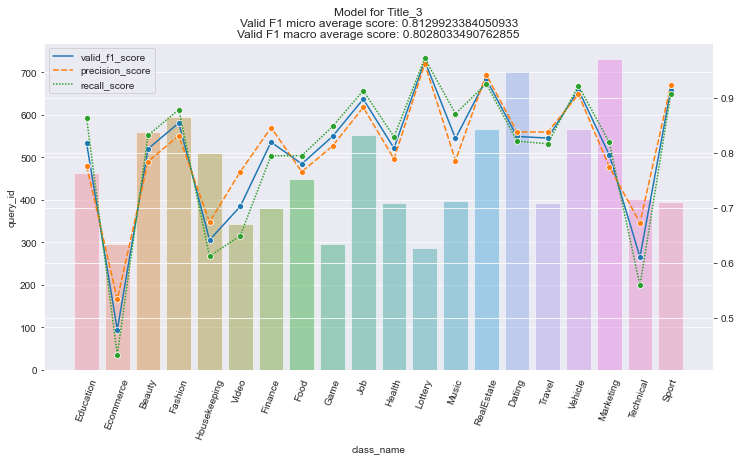

In [17]:
for i in range(1,4):
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']
    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'title_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3)
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = LinearSVC(C=1)
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Model for Title_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'title_{i}'] = eval_result


## Final Model for Content

Training...


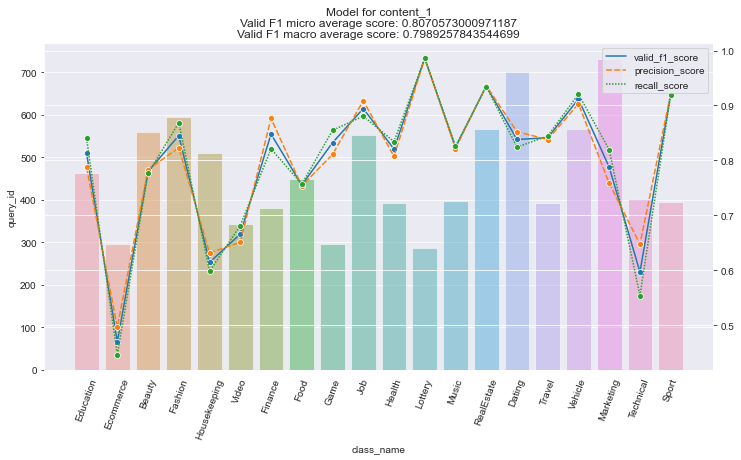

Training...


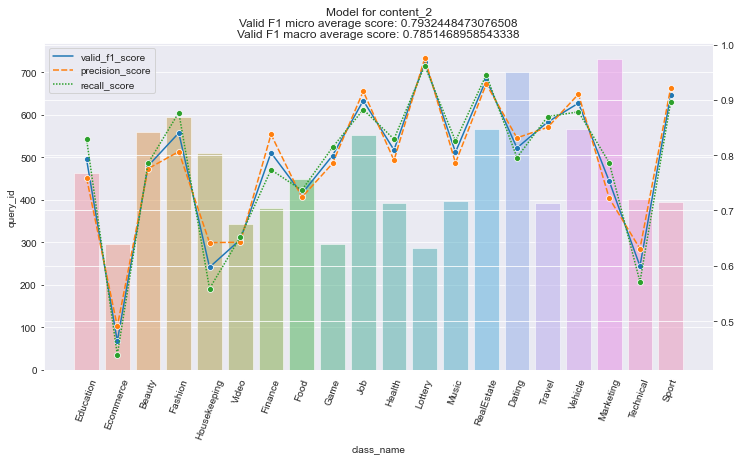

Training...


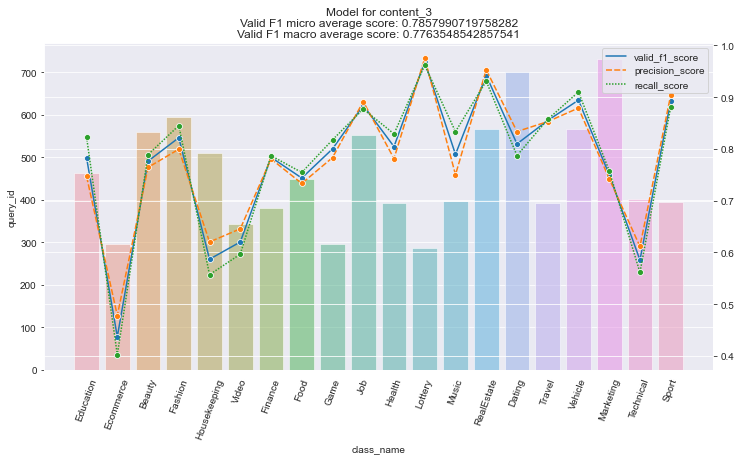

In [19]:
for i in range(1,4):
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'content_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']
    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'content_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('tokenize', Tokenizer()),
    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3)
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = LinearSVC(C=0.5)
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Model for content_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'content_{i}'] = eval_result


## Model Stacking

In [20]:
model_names = ['query','title_1','title_2','title_3','content_1','content_2','content_3']

In [21]:
for model in model_names:
    clf = results[model]['model']
    pipeline = results[model]['pipeline']
    X_valid = pipeline[0].transform(valid_df)
    X_valid = pipeline[1].transform(X_valid)
    valid_df[f'{model}_pred'] = clf.predict(X_valid)
    

<ipython-input-21-3a12e963e4e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df[f'{model}_pred'] = clf.predict(X_valid)


In [22]:
## Additional features:

for col in ['title_1','title_2','title_3','content_1','content_2','content_3']:
    valid_df[f'{col}_num_bolds'] = valid_df[col].str.count('<b>')

<ipython-input-22-00250a8f3ca8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df[f'{col}_num_bolds'] = valid_df[col].str.count('<b>')


In [23]:
meta_columns = valid_df.columns[10:]

In [24]:
X_meta = valid_df[meta_columns]

In [25]:
y_meta = valid_df.class_label

In [26]:
from sklearn.ensemble import RandomForestClassifier


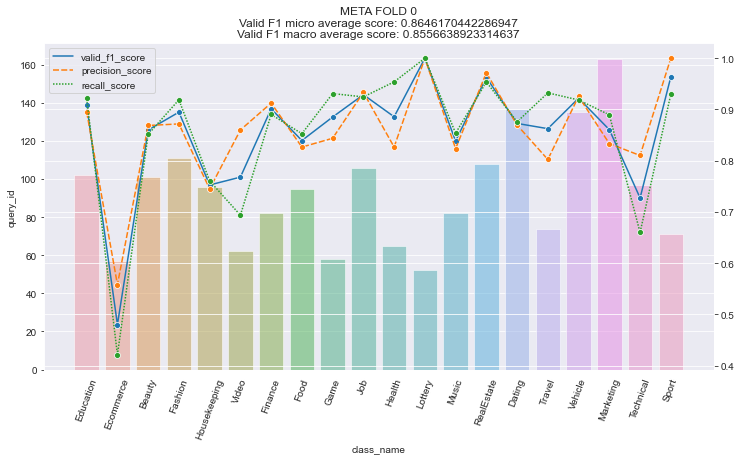

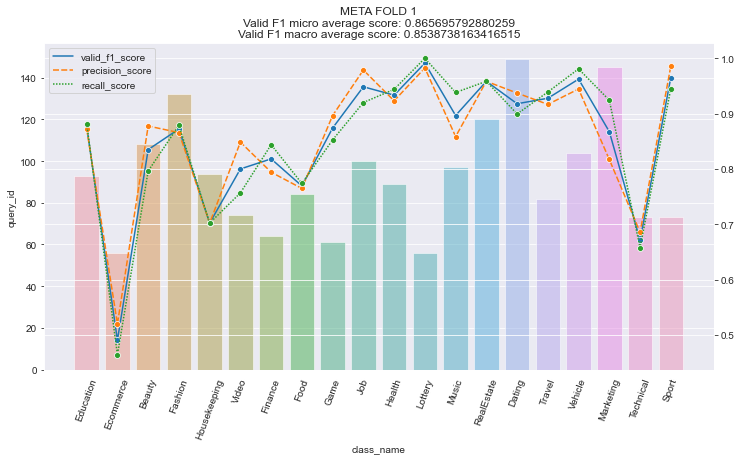

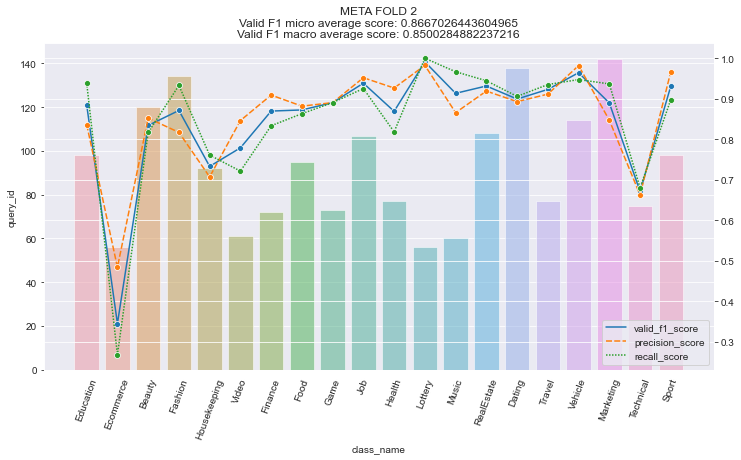

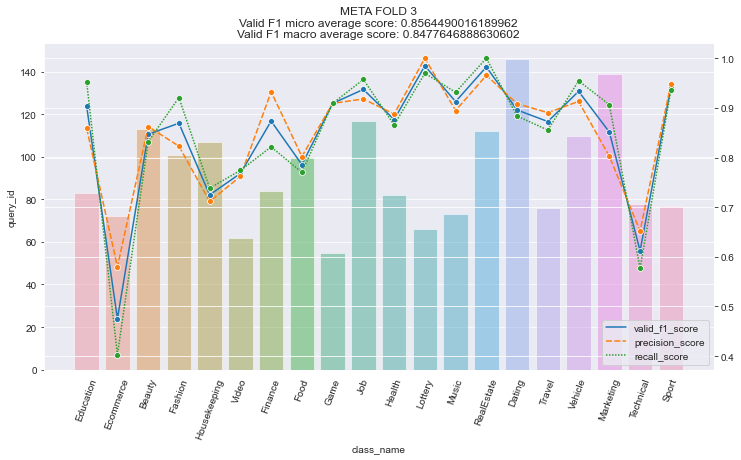

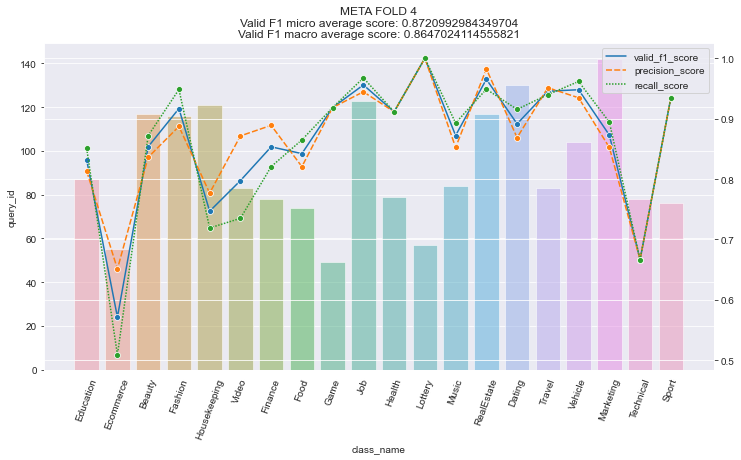

In [27]:
kf = KFold(n_splits=5)
i = 0
for train_idx, valid_idx in kf.split(X_meta):
    meta_train_df = valid_df.iloc[train_idx]
    meta_valid_df = valid_df.iloc[valid_idx]    
    X_meta_train = meta_train_df[meta_columns]
    y_meta_train = meta_train_df.class_label
    X_meta_valid = meta_valid_df[meta_columns]
    y_meta_valid = meta_valid_df.class_label
    model = RandomForestClassifier()
    model.fit(X_meta_train, y_meta_train)
    pred = model.predict(X_meta_valid)
    result = scoring(meta_valid_df, pred)
    plot_result(result,f'META FOLD {i}')
    i+=1

In [67]:
meta_columns

Index(['query_pred', 'title_1_pred', 'title_2_pred', 'title_3_pred',
       'content_1_pred', 'content_2_pred', 'content_3_pred',
       'title_1_num_bolds', 'title_2_num_bolds', 'title_3_num_bolds',
       'content_1_num_bolds', 'content_2_num_bolds', 'content_3_num_bolds'],
      dtype='object')

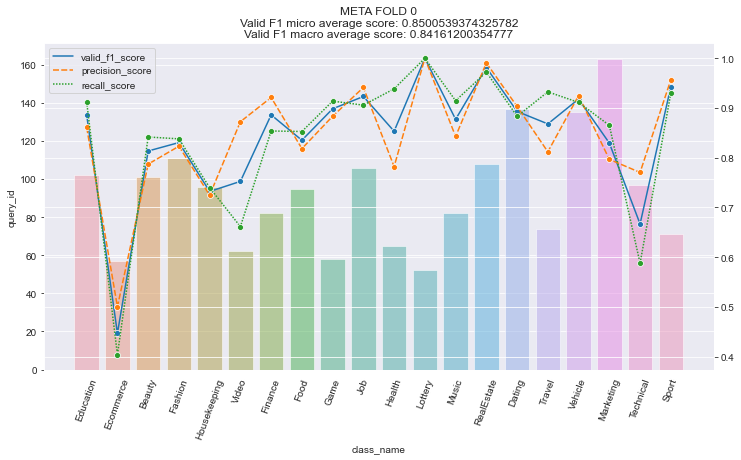

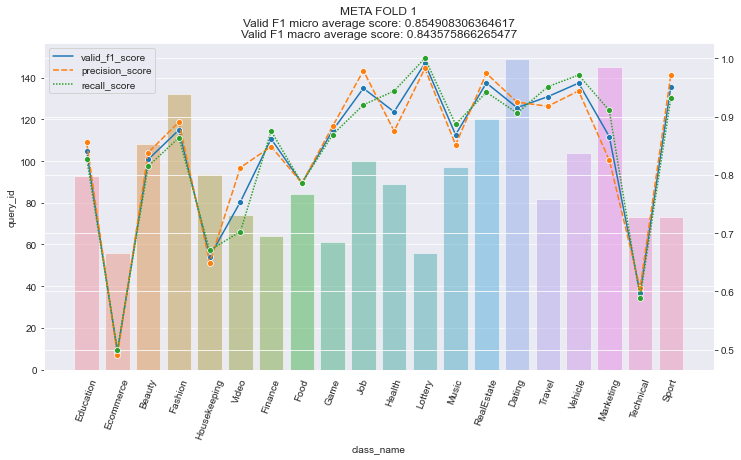

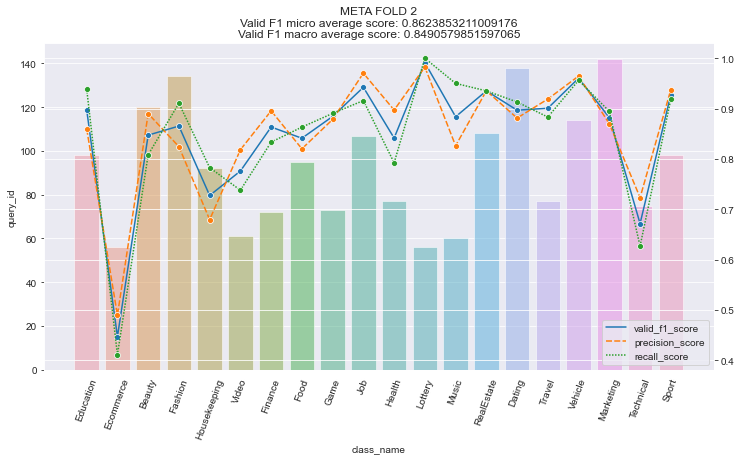

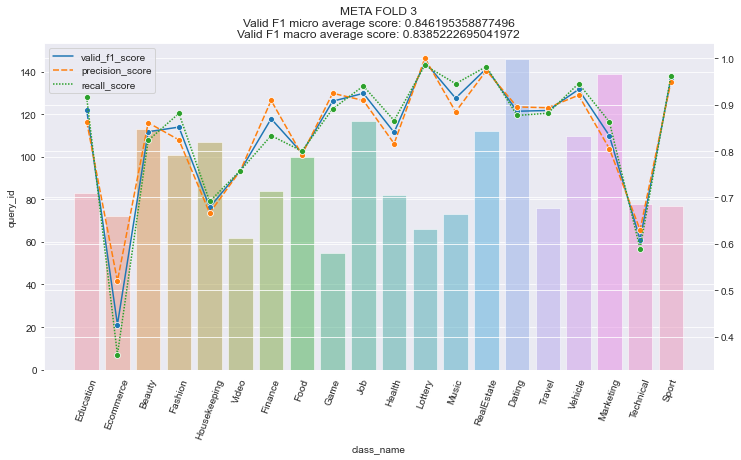

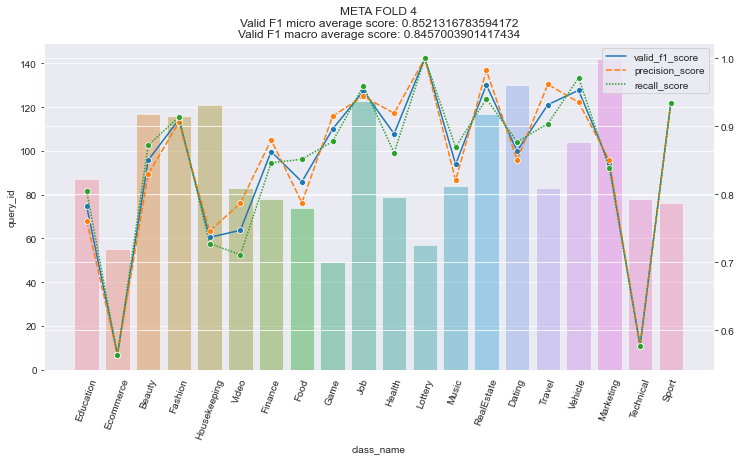

In [68]:
kf = KFold(n_splits=5)
i = 0
for train_idx, valid_idx in kf.split(X_meta):
    meta_train_df = valid_df.iloc[train_idx]
    meta_valid_df = valid_df.iloc[valid_idx]    
    X_meta_train = meta_train_df[meta_columns[:-6]]
    y_meta_train = meta_train_df.class_label
    X_meta_valid = meta_valid_df[meta_columns[:-6]]
    y_meta_valid = meta_valid_df.class_label
    model = RandomForestClassifier()
    model.fit(X_meta_train, y_meta_train)
    pred = model.predict(X_meta_valid)
    result = scoring(meta_valid_df, pred)
    plot_result(result,f'META FOLD {i}')
    i+=1

## Content combine with tone removal and take lowercase

Training...


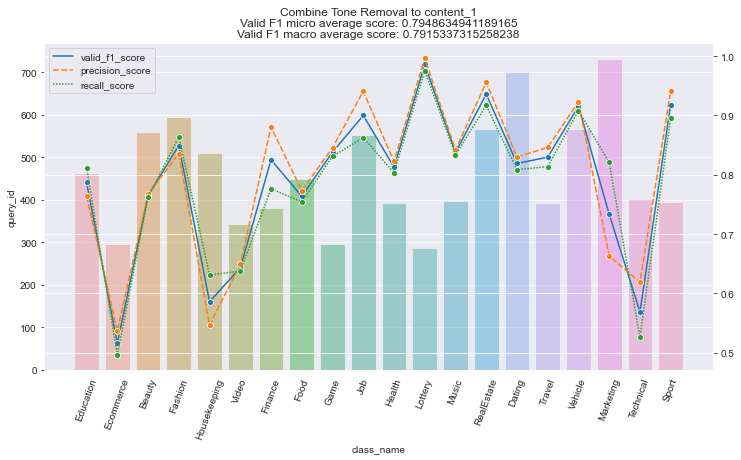

Training...


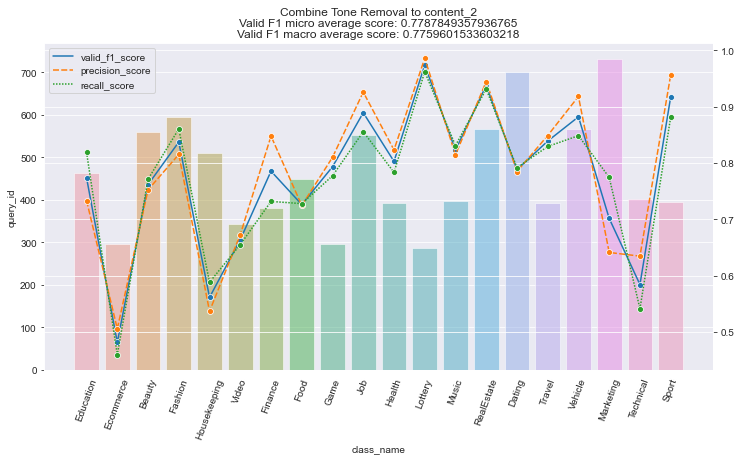

Training...


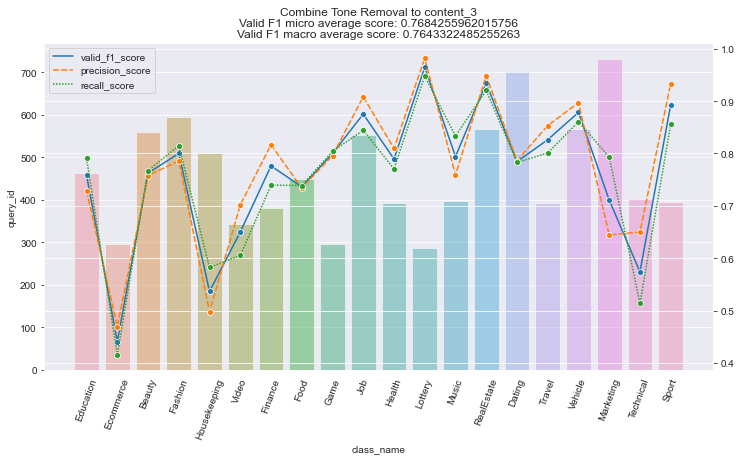

In [16]:
for i in range(1,4):
    
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector(f'content_{i}')),
    ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']

    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector(f'content_{i}')),
    #     ('tone_removal', ToneRemoval()),
    ('tag_removal', TagRemoval()),
    ('quote_removal', QuoteRemoval()),
    ('to_lowercase', ToLowercase()),

    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)

    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Combine Tone Removal to content_{i}')
    eval_result['model'] = clf
    eval_result['pipeline'] = [pipeline_2, vectorizer]
    results[f'content_{i}'] = eval_result


## Model Stacking

Training....
Evaluating....


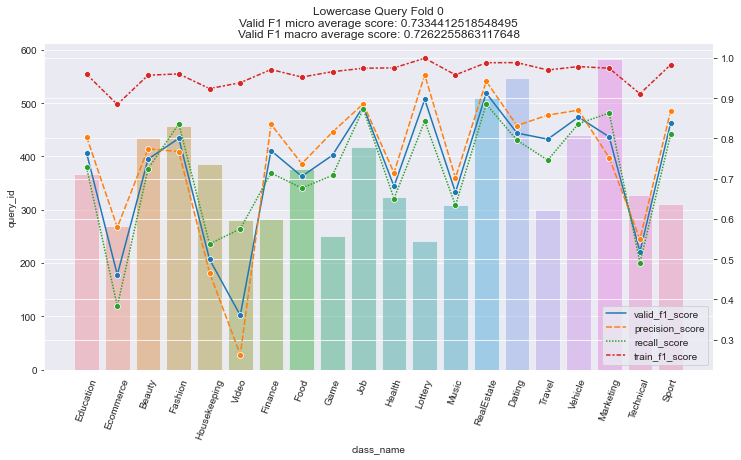

Training....
Evaluating....


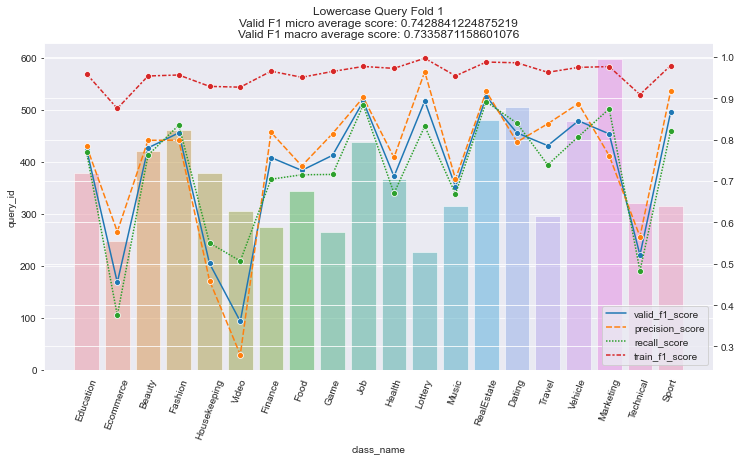

Training....
Evaluating....


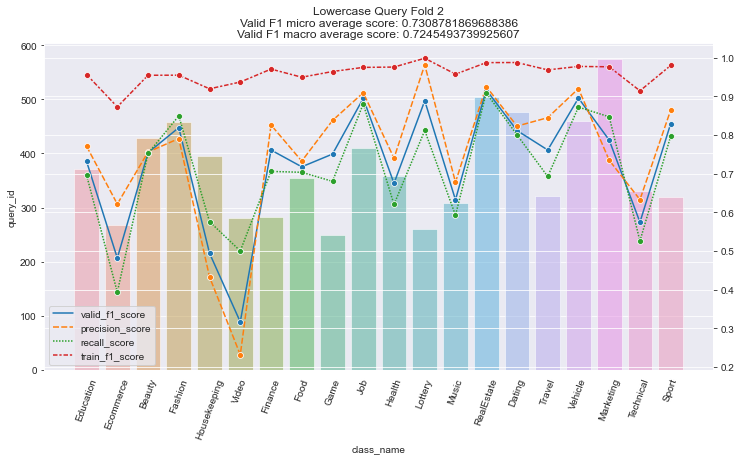

Training....
Evaluating....


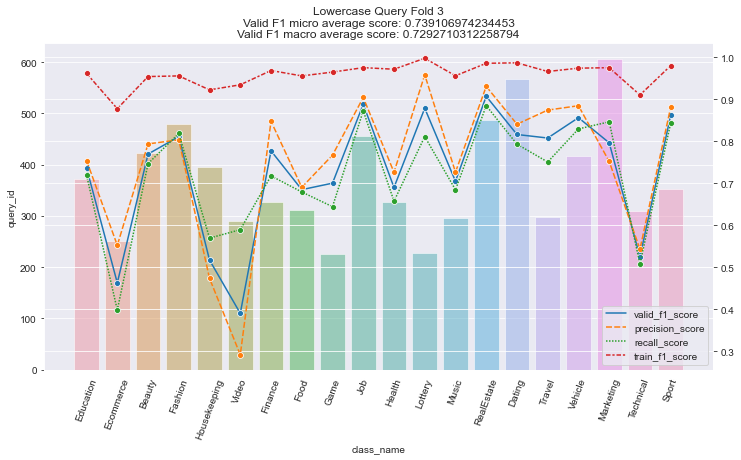

Training....
Evaluating....


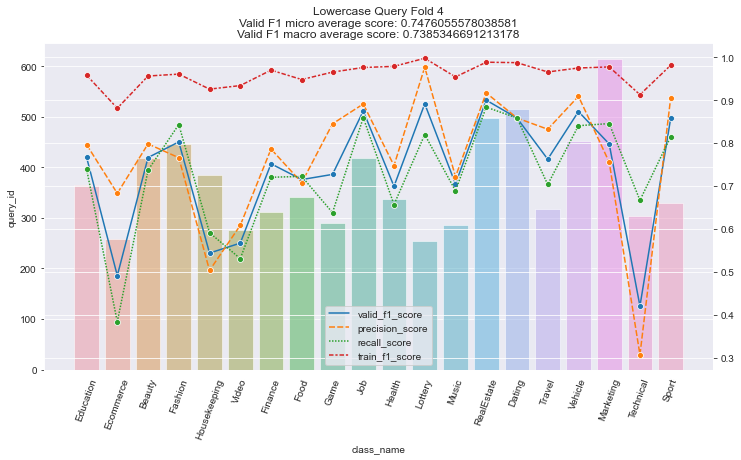

In [60]:
kf = KFold(n_splits=5)
i = 0
for train_idx, valid_idx in kf.split(df):
    train_df = df.iloc[train_idx]
    valid_df = df.iloc[valid_idx]
    
    pipeline = Pipeline([
    ('column_selection', ColumnSelector('query')),
    ('to_lowercase', ToLowercase()),
    ('clean', CleanTextField()),
    ('vectorizer', TfidfVectorizer())
    ])
    
    X_train = pipeline.fit_transform(train_df)
    y_train = train_df['class_label']
    X_valid = pipeline.transform(valid_df)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training....")
    clf.fit(X_train, y_train)
    print("Evaluating....")
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Lowercase Query Fold {i}')
    results['lowercase_query'].append(eval_result)
    i+=1

Training....
Evaluating....


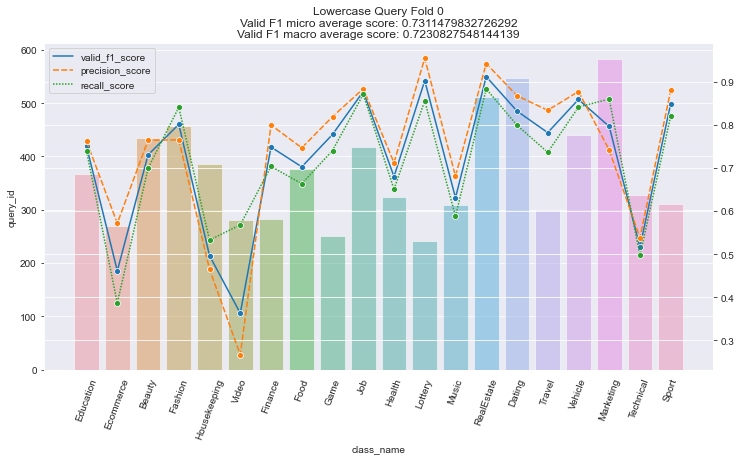

Training....
Evaluating....


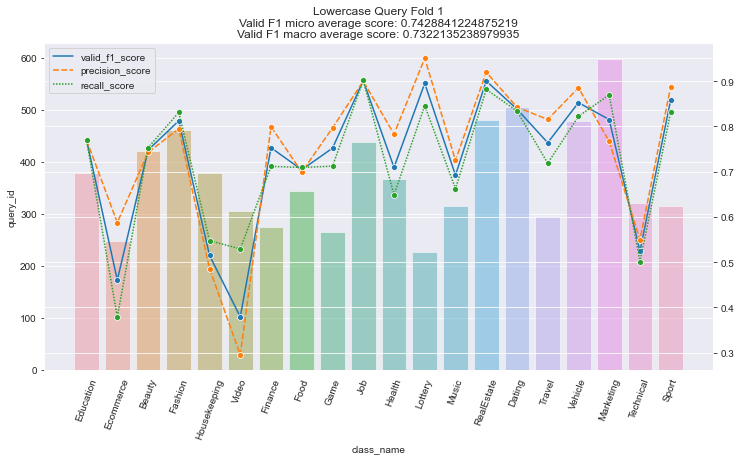

Training....
Evaluating....


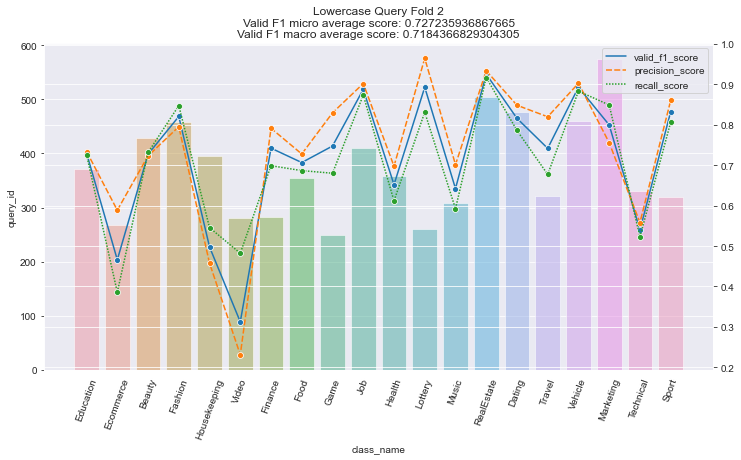

Training....
Evaluating....


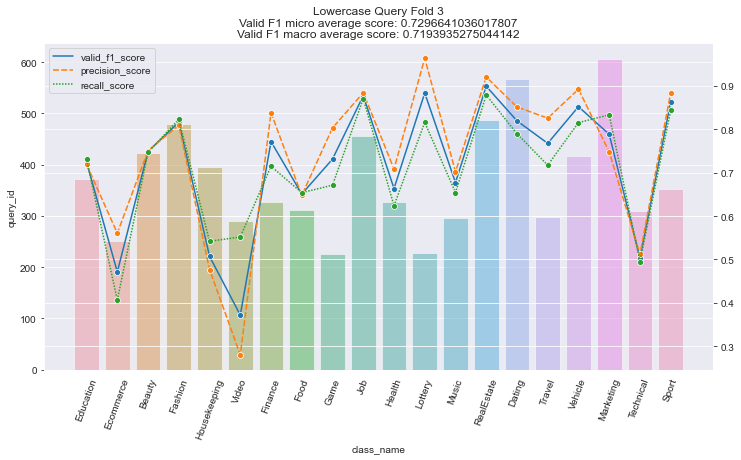

Training....
Evaluating....


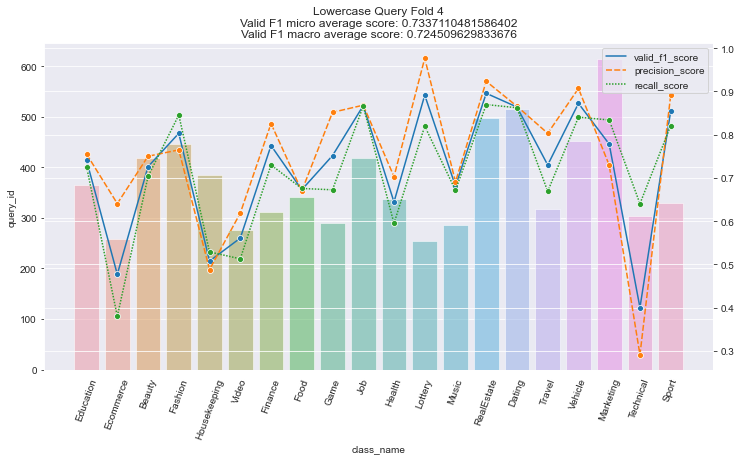

In [23]:
kf = KFold(n_splits=5)
i = 0
for train_idx, valid_idx in kf.split(df):
    train_df = df.iloc[train_idx]
    valid_df = df.iloc[valid_idx]
    pipeline = Pipeline([
    ('column_selection', ColumnSelector('query')),
    ('tone_removal', ToneRemoval()),
    ('clean', CleanTextField()),
    ('vectorizer', TfidfVectorizer())
    ])
    
    X_train = pipeline.fit_transform(train_df)
    y_train = train_df['class_label']
    X_valid = pipeline.transform(valid_df)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training....")
    clf.fit(X_train, y_train)
    print("Evaluating....")
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Tone Removal Query Fold {i}')
    results['tone_removal_query'].append(eval_result)
    i+=1

### Combine tone removal and original query of train set

In [24]:
import numpy as np

Training...


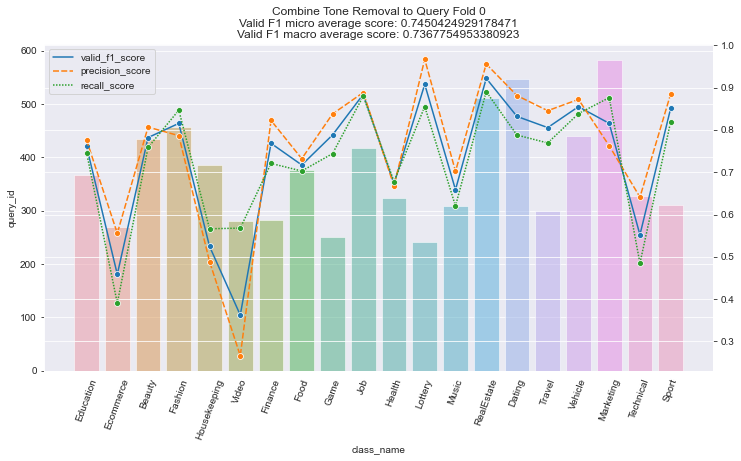

Training...


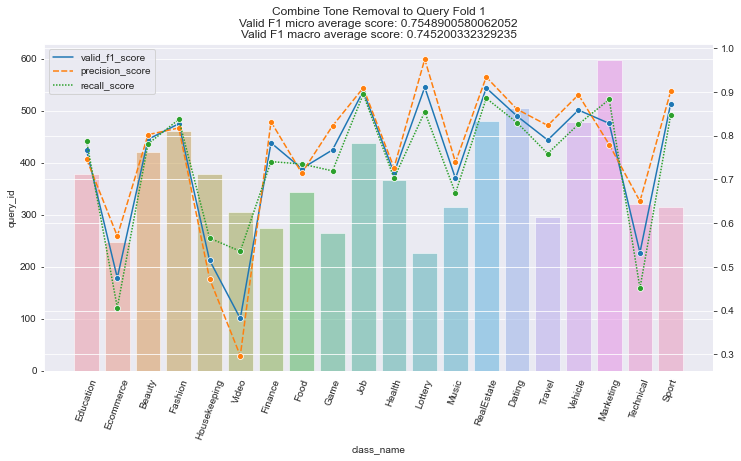

Training...


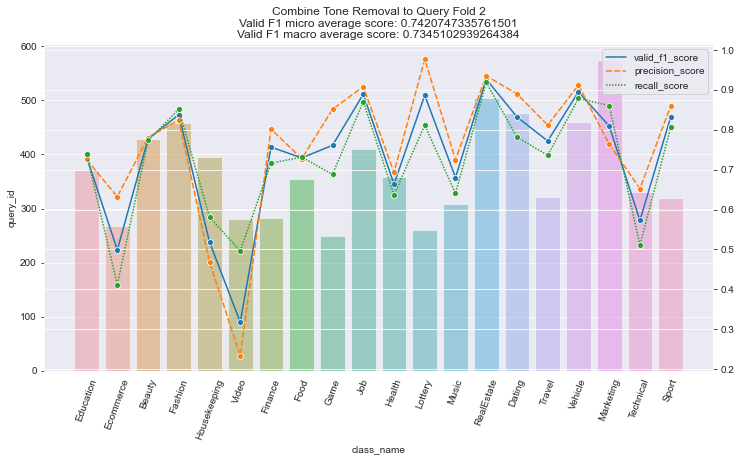

Training...


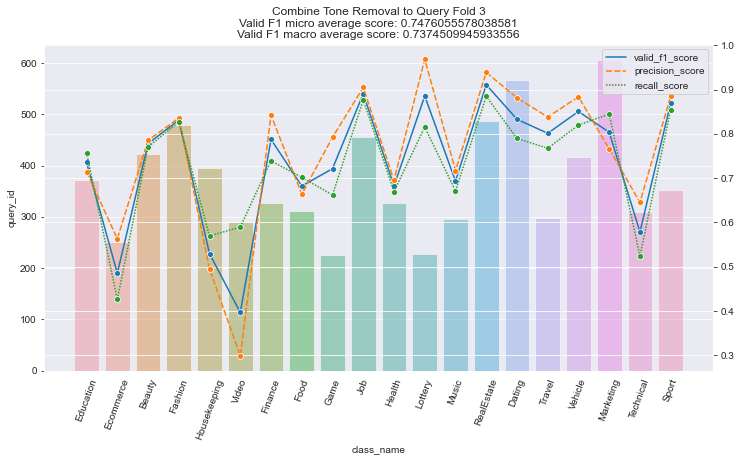

Training...


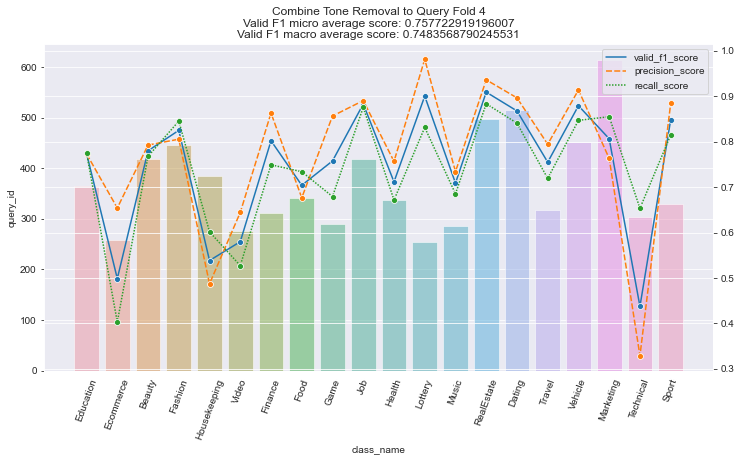

In [27]:
kf = KFold(n_splits=5)
i = 0
for train_idx, valid_idx in kf.split(df):
    train_df = df.iloc[train_idx]
    valid_df = df.iloc[valid_idx]
    pipeline_1 = Pipeline([
    ('column_selection', ColumnSelector('query')),
    ('tone_removal', ToneRemoval()),
    ('clean', CleanTextField()),
    ])
    X_train1 = pipeline_1.fit_transform(train_df)
    y_train1 = train_df['class_label']

    pipeline_2= Pipeline([
    ('column_selection', ColumnSelector('query')),
#     ('tone_removal', ToneRemoval()),
    ('clean', CleanTextField()),
    ])
    X_train2 = pipeline_2.fit_transform(train_df)
    y_train2 = train_df['class_label']
    X_train = pd.concat([X_train1, X_train2])
    y_train = pd.concat([y_train1, y_train2])
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(X_train)
    
    X_valid = pipeline_2.transform(valid_df)
    X_valid = vectorizer.transform(X_valid)
    y_valid = valid_df['class_label']
    clf = SVC()
    print("Training...")
    clf.fit(X_train, y_train)
    valid_preds = clf.predict(X_valid)
    eval_result = scoring(valid_df, valid_preds)
    plot_result(eval_result,f'Combine Tone Removal to Query Fold {i}')
    results['combine_tone_removal_query'].append(eval_result)
    i+=1

## title with simple clean


Training...


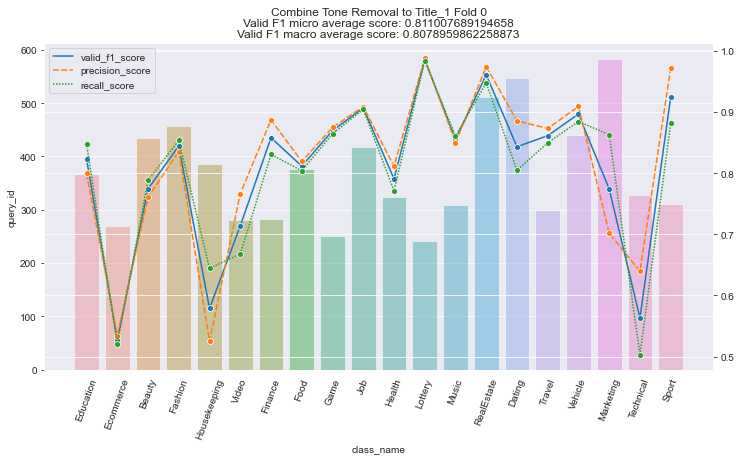

Training...


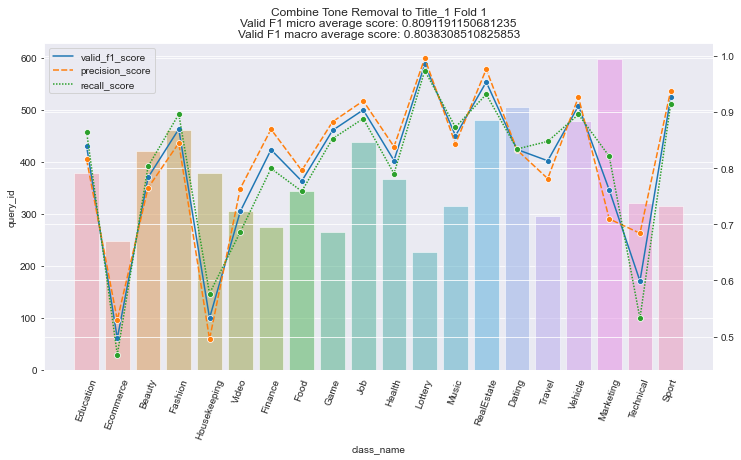

Training...


In [ ]:
for ii in range(1,3):
    kf = KFold(n_splits=5)
    i = 0
    for train_idx, valid_idx in kf.split(df):
        train_df = df.iloc[train_idx]
        valid_df = df.iloc[valid_idx]
        pipeline_1 = Pipeline([
        ('column_selection', ColumnSelector(f'title_{ii}')),
        ('tone_removal', ToneRemoval()),
        ('tag_removal', TagRemoval()),
        ('quote_removal', QuoteRemoval()),
        ('clean', CleanTextField()),
        ])
        X_train1 = pipeline_1.fit_transform(train_df)
        y_train1 = train_df['class_label']
        pipeline_2= Pipeline([
        ('column_selection', ColumnSelector(f'title_{ii}')),
        ('tag_removal', TagRemoval()),
        ('quote_removal', QuoteRemoval()),
        ('clean', CleanTextField()),
        ])
        X_train2 = pipeline_2.fit_transform(train_df)
        y_train2 = train_df['class_label']
        X_train = pd.concat([X_train1, X_train2])
        y_train = pd.concat([y_train1, y_train2])
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)

        X_valid = pipeline_2.transform(valid_df)
        X_valid = vectorizer.transform(X_valid)
        y_valid = valid_df['class_label']
        clf = SVC()
        print("Training...")
        clf.fit(X_train, y_train)
        valid_preds = clf.predict(X_valid)
        eval_result = scoring(valid_df, valid_preds)
        plot_result(eval_result,f'Combine Tone Removal to Title_{ii} Fold {i}')
        results[f'combine_tone_removal_title_{ii}'].append(eval_result)
        i+=1

In [ ]:
for ii in range(1,3):
    kf = KFold(n_splits=5)
    i = 0
    for train_idx, valid_idx in kf.split(df):
        train_df = df.iloc[train_idx]
        valid_df = df.iloc[valid_idx]
        pipeline_1 = Pipeline([
        ('column_selection', ColumnSelector(f'content_{ii}')),
        ('tone_removal', ToneRemoval()),
        ('tag_removal', TagRemoval()),
        ('quote_removal', QuoteRemoval()),
        ('clean', CleanTextField()),
        ])
        X_train1 = pipeline_1.fit_transform(train_df)
        y_train1 = train_df['class_label']
        pipeline_2= Pipeline([
        ('column_selection', ColumnSelector(f'content_{ii}')),
        ('tag_removal', TagRemoval()),
        ('quote_removal', QuoteRemoval()),
        ('clean', CleanTextField()),
        ])
        X_train2 = pipeline_2.fit_transform(train_df)
        y_train2 = train_df['class_label']
        X_train = pd.concat([X_train1, X_train2])
        y_train = pd.concat([y_train1, y_train2])
        vectorizer = TfidfVectorizer()
        X_train = vectorizer.fit_transform(X_train)

        X_valid = pipeline_2.transform(valid_df)
        X_valid = vectorizer.transform(X_valid)
        y_valid = valid_df['class_label']
        clf = SVC()
        print("Training...")
        clf.fit(X_train, y_train)
        valid_preds = clf.predict(X_valid)
        eval_result = scoring(valid_df, valid_preds)
        plot_result(eval_result,f'Combine Tone Removal to Content_{ii} Fold {i}')
        results[f'combine_tone_removal_title_{ii}'].append(eval_result)
        i+=1

In [11]:
df.head()

query_id                                           query  class_label  \
0     55365              lịch bán vé chung kết aff cup 2018           19   
1     57875  thuê nhà nguyên căn tại phường vĩnh nguyên           13   
2     39016                                   google camera           18   
3     30731                               gpx gentleman 150           16   
4     41697            số điện thoại zalo gái nhận chat sex           14   

                                             title_1  \
0  <b>Chung kết</b> <b>AFF</b> <b>Cup</b> <b>2018...   
1  <b>Cho thuê</b> nhà riêng <b>tại</b> <b>Phường...   
2  <b>Google</b> <b>Camera</b> - Apps on <b>Googl...   
3  Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200 ...   
4  &quot;Thiên đường <b>sex</b> online <b>Zalo</b...   

                                           content_1  \
0  Thể Thao 247 - VFF chính thức công bố phương á...   
1  <b>Cho thuê</b> nhà riêng giá rẻ, chính chủ, c...   
2  Never miss a moment with <b>Google</b> <b>Came...   
3  Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200,...   
4  Grab xin giấy phép ngân hàng <b>số</b> tại Sin...   

                                             title_2  \
0  <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1  <b>Nhà</b> <b>nguyên căn</b> <b>cho thuê</b> <...   
2       <b>Google</b> <b>Camera</b> APKs - APKMirror   
3  Giá xe <b>GPX</b> <b>Gentleman</b> 200 | Thông...   
4  Kết Bạn Online - Wap <b>chat</b> <b>sex</b> 3 ...   

                                           content_2  \
0  <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1  <b>Nhà</b> bao gồm 1 tầng, 1 phòng ngủ, 1 toil...   
2  Have an APK file for an alpha, beta, or staged...   
3  Gia xe <b>GPX</b> <b>Gentleman</b> 200, Gia xe...   
4  Wap <b>Chát</b> Kết Bạn Online, Kết Bạn Trực T...   

                                             title_3  \
0  Cách mua <b>vé</b> trận <b>chung kết</b> <b>AF...   
1  CHÍNH CHỦ <b>CHO THUÊ</b> <b>NHÀ</b> <b>NGUYÊN...   
2  <b>Google</b> <b>Camera</b> Port Hub - xda-dev...   
3  Đã có giá xe <b>GPX</b> Legend <b>150</b>S và ...   
4  Mê &quot;<b>chat</b> <b>sex</b>&quot;, một tha...   

                                           content_3  class_name  
0  Mua <b>vé</b> trận <b>chung kết</b> <b>AFF</b>...       Sport  
1  <b>VĨNH NGUYÊN</b>-TP NHA TRANG-KHÁNH HÒA -Diệ...  RealEstate  
2  This is a hub for all the various <b>Google</b...   Technical  
3  Giá xe <b>GPX</b> Legend <b>150</b>S Legend 20...     Vehicle  
4  Sau buổi gặp mặt lần đầu, nam thanh niên đã xi...      Dating

In [6]:
df.head()

query_id                                           query  class_label  \
0     55365              lịch bán vé chung kết aff cup 2018           19   
1     57875  thuê nhà nguyên căn tại phường vĩnh nguyên           13   
2     39016                                   google camera           18   
3     30731                               gpx gentleman 150           16   
4     41697            số điện thoại zalo gái nhận chat sex           14   

                                             title_1  \
0  <b>Chung kết</b> <b>AFF</b> <b>Cup</b> <b>2018...   
1  <b>Cho thuê</b> nhà riêng <b>tại</b> <b>Phường...   
2  <b>Google</b> <b>Camera</b> - Apps on <b>Googl...   
3  Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200 ...   
4  &quot;Thiên đường <b>sex</b> online <b>Zalo</b...   

                                           content_1  \
0  Thể Thao 247 - VFF chính thức công bố phương á...   
1  <b>Cho thuê</b> nhà riêng giá rẻ, chính chủ, c...   
2  Never miss a moment with <b>Google</b> <b>Came...   
3  Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200,...   
4  Grab xin giấy phép ngân hàng <b>số</b> tại Sin...   

                                             title_2  \
0  <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1  <b>Nhà</b> <b>nguyên căn</b> <b>cho thuê</b> <...   
2       <b>Google</b> <b>Camera</b> APKs - APKMirror   
3  Giá xe <b>GPX</b> <b>Gentleman</b> 200 | Thông...   
4  Kết Bạn Online - Wap <b>chat</b> <b>sex</b> 3 ...   

                                           content_2  \
0  <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1  <b>Nhà</b> bao gồm 1 tầng, 1 phòng ngủ, 1 toil...   
2  Have an APK file for an alpha, beta, or staged...   
3  Gia xe <b>GPX</b> <b>Gentleman</b> 200, Gia xe...   
4  Wap <b>Chát</b> Kết Bạn Online, Kết Bạn Trực T...   

                                             title_3  \
0  Cách mua <b>vé</b> trận <b>chung kết</b> <b>AF...   
1  CHÍNH CHỦ <b>CHO THUÊ</b> <b>NHÀ</b> <b>NGUYÊN...   
2  <b>Google</b> <b>Camera</b> Port Hub - xda-dev...   
3  Đã có giá xe <b>GPX</b> Legend <b>150</b>S và ...   
4  Mê &quot;<b>chat</b> <b>sex</b>&quot;, một tha...   

                                           content_3  
0  Mua <b>vé</b> trận <b>chung kết</b> <b>AFF</b>...  
1  <b>VĨNH NGUYÊN</b>-TP NHA TRANG-KHÁNH HÒA -Diệ...  
2  This is a hub for all the various <b>Google</b...  
3  Giá xe <b>GPX</b> Legend <b>150</b>S Legend 20...  
4  Sau buổi gặp mặt lần đầu, nam thanh niên đã xi...

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pyvi import ViTokenizer

In [3]:
plt.rcParams["figure.figsize"] = (9,6)
sns.set_style("darkgrid")

In [4]:

with open("ds/category_list") as f:
    label2idx = eval(f.read())
    
idx2label = {v:k for k,v in label2idx.items()}

In [5]:
df = pd.read_csv("ds/train.csv", sep='|')

In [6]:
df.columns = [i.lower().replace(" ",'_') for i in df.columns]

In [7]:
df['class_name'] = df.class_label.map(idx2label)

## Train valid split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_df, valid_df = train_test_split(df, test_size=0.2, random_state =1 ,stratify=df.class_label )

## Baseline model

### Fast text classification model

In [10]:
train_df.head()

query_id                            query  class_label class_name
12431     51133                        tỷ giá úd            6    Finance
8881      43799  cách chế biến món cá đuối nướng            7       Food
6336      52027                trò chơi đào vàng            8       Game
36352     25676                       ket ban nu           14     Dating
24319     19895            chat video trực tuyến           14     Dating

In [26]:
from pyvi import ViTokenizer

In [29]:
def create_fasttext_ds(df, fn):
    path = f'ds/fasttext/{fn}.txt'
    with open(path,'w+') as f:
        for _, row in df.iterrows():
            f.write(f'__label__{row.class_name} {ViTokenizer.tokenize(row.query).replace("_"," ")}\n')
    return path

In [30]:
train_path = create_fasttext_ds(train_df, 'train')

In [31]:
valid_path = create_fasttext_ds(valid_df, 'valid')

In [32]:
import fasttext
model = fasttext.train_supervised(input=train_path)


In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [37]:
# Evaluate
train_preds = []

for _,row in train_df.iterrows():
    pred = model.predict(ViTokenizer.tokenize(row.query).replace("_"," "))[0][0].split("__")[-1]
    train_preds.append(pred)


# Evaluate
preds = []

for _,row in valid_df.iterrows():
    pred = model.predict(ViTokenizer.tokenize(row.query).replace("_"," "))[0][0].split("__")[-1]
    preds.append(pred)

    

In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [39]:
score = f1_score(valid_df.class_name.tolist(), preds, average='micro')
print("F1 micro test score:", score)

score = f1_score(train_df.class_name.tolist(), train_preds, average='micro')
print("F1 micro train score:", score)




score = f1_score(valid_df.class_name.tolist(), preds, average='macro')
print("F1 macro valid score:", score)

score = f1_score(train_df.class_name.tolist(), train_preds, average='macro')
print("F1 macro train score:", score)



F1 micro test score: 0.7295780727311967
F1 micro train score: 0.8966140563874275
F1 macro valid score: 0.7173693044163894
F1 macro train score: 0.8897923470274011


### SVM on query data with TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer()

In [21]:
X_train = vectorizer.fit_transform(train_df['query'])

In [22]:
X_valid = vectorizer.transform(valid_df['query'])

In [23]:
X_valid.shape

(9267, 13320)

In [24]:
from sklearn.svm import SVC

In [25]:
model = SVC()

In [26]:
model.fit(X_train, train_df.class_label)

SVC()

In [27]:
train_preds = model.predict(X_train)

In [28]:
preds = model.predict(X_valid)

In [29]:
f1_score_by_category = f1_score(valid_df.class_label, preds, average=None)

In [30]:
valid_df.head()

query_id                                     query  class_label  \
34483     48776                        tim việc làm nhanh            9   
43272     25917                trực tiếp bóng đá fpt play           19   
23659     52086  lộ trình xe hoàng hà gia lâm về nam định           16   
40695     41464                      quần áo thể thao nam            1   
33603     46421                    đăng ký google adwords           17   

      class_name  
34483        Job  
43272      Sport  
23659    Vehicle  
40695  Ecommerce  
33603  Marketing

In [44]:
train_df.head()

query_id                            query  class_label class_name
12431     51133                        tỷ giá úd            6    Finance
8881      43799  cách chế biến món cá đuối nướng            7       Food
6336      52027                trò chơi đào vàng            8       Game
36352     25676                       ket ban nu           14     Dating
24319     19895            chat video trực tuyến           14     Dating

In [31]:
score_stats = valid_df.groupby(['class_label','class_name']).query_id.nunique().reset_index().sort_values(by='class_label')

In [32]:
score_stats['valid_f1_score'] = f1_score_by_category
score_stats['train_f1_score'] = f1_score(train_df.class_label, train_preds, average=None)
score_stats['valid_precision_score'] = precision_score(valid_df.class_label, preds, average=None)
score_stats['valid_recall_score'] = recall_score(valid_df.class_label, preds, average=None)



In [ ]:
def show_model_performance(model, train_df, valid_df):
    

<AxesSubplot:label='de67f34d-b89b-41b2-93e8-a6dadda9e9c1'>

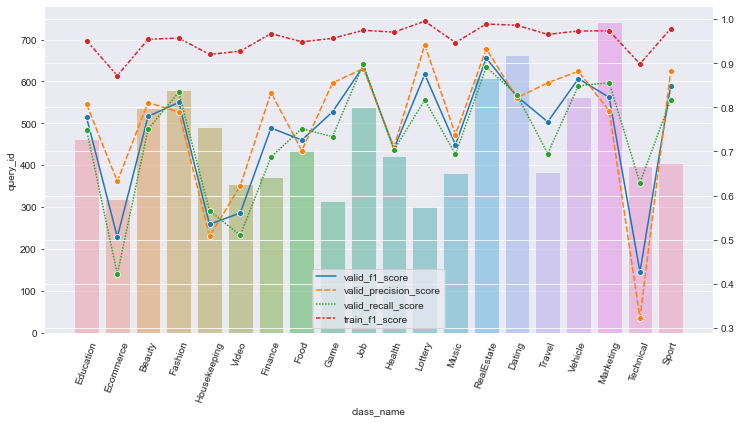

In [33]:
ax1 = sns.set_style(style='darkgrid', rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(data = score_stats, x='class_name', y='query_id', alpha=0.5, ax=ax1)
plt.xticks(rotation=70)
ax2 = ax1.twinx()
sns.lineplot(data = score_stats[['valid_f1_score','valid_precision_score', 'valid_recall_score','train_f1_score']], marker='o', sort = False, ax=ax2)





### SVM on title data with tf-idf

In [44]:
query_df = pd.read_csv('ds/train_serp.csv', sep = '|')
query_df.columns = [i.lower().replace(" ",'_') for i in query_df.columns]

In [46]:
full_df = pd.merge(df, query_df, on = 'query_id')

In [47]:
full_df.head()

query_id                                           query  class_label  \
0     55365              lịch bán vé chung kết aff cup 2018           19   
1     57875  thuê nhà nguyên căn tại phường vĩnh nguyên           13   
2     39016                                   google camera           18   
3     30731                               gpx gentleman 150           16   
4     41697            số điện thoại zalo gái nhận chat sex           14   

   class_name                                            title_1  \
0       Sport  <b>Chung kết</b> <b>AFF</b> <b>Cup</b> <b>2018...   
1  RealEstate  <b>Cho thuê</b> nhà riêng <b>tại</b> <b>Phường...   
2   Technical  <b>Google</b> <b>Camera</b> - Apps on <b>Googl...   
3     Vehicle  Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200 ...   
4      Dating  &quot;Thiên đường <b>sex</b> online <b>Zalo</b...   

                                           content_1  \
0  Thể Thao 247 - VFF chính thức công bố phương á...   
1  <b>Cho thuê</b> nhà riêng giá rẻ, chính chủ, c...   
2  Never miss a moment with <b>Google</b> <b>Came...   
3  Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200,...   
4  Grab xin giấy phép ngân hàng <b>số</b> tại Sin...   

                                             title_2  \
0  <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1  <b>Nhà</b> <b>nguyên căn</b> <b>cho thuê</b> <...   
2       <b>Google</b> <b>Camera</b> APKs - APKMirror   
3  Giá xe <b>GPX</b> <b>Gentleman</b> 200 | Thông...   
4  Kết Bạn Online - Wap <b>chat</b> <b>sex</b> 3 ...   

                                           content_2  \
0  <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1  <b>Nhà</b> bao gồm 1 tầng, 1 phòng ngủ, 1 toil...   
2  Have an APK file for an alpha, beta, or staged...   
3  Gia xe <b>GPX</b> <b>Gentleman</b> 200, Gia xe...   
4  Wap <b>Chát</b> Kết Bạn Online, Kết Bạn Trực T...   

                                             title_3  \
0  Cách mua <b>vé</b> trận <b>chung kết</b> <b>AF...   
1  CHÍNH CHỦ <b>CHO THUÊ</b> <b>NHÀ</b> <b>NGUYÊN...   
2  <b>Google</b> <b>Camera</b> Port Hub - xda-dev...   
3  Đã có giá xe <b>GPX</b> Legend <b>150</b>S và ...   
4  Mê &quot;<b>chat</b> <b>sex</b>&quot;, một tha...   

                                           content_3  
0  Mua <b>vé</b> trận <b>chung kết</b> <b>AFF</b>...  
1  <b>VĨNH NGUYÊN</b>-TP NHA TRANG-KHÁNH HÒA -Diệ...  
2  This is a hub for all the various <b>Google</b...  
3  Giá xe <b>GPX</b> Legend <b>150</b>S Legend 20...  
4  Sau buổi gặp mặt lần đầu, nam thanh niên đã xi...

In [ ]:
print("Evaluate model performance on cleaned title of each top search result")
train_df, test_df = train_test_split(full_df, test_size=0.2, random_state =1 ,stratify=full_df.class_label )
for i in range(1,4):
    col = f'title_{i}'
    full_df[f'cleaned_title_{i}'] = full_
    vectorizer = TfidfVectorizer()    


In [45]:
query_df

query_id                                            title_1  \
0         55365  <b>Chung kết</b> <b>AFF</b> <b>Cup</b> <b>2018...   
1         57875  <b>Cho thuê</b> nhà riêng <b>tại</b> <b>Phường...   
2         39016  <b>Google</b> <b>Camera</b> - Apps on <b>Googl...   
3         30731  Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200 ...   
4         41697  &quot;Thiên đường <b>sex</b> online <b>Zalo</b...   
...         ...                                                ...   
46327     18262  Hãng <b>nước hoa</b> <b>Yves</b> <b>Saint</b> ...   
46328     13732  Trò chuyện cùng <b>CEO</b> <b>IMAS</b> Marketi...   
46329     16825  Bán căn hộ <b>chung cư</b> tại đường <b>Nguyễn...   
46330     35822      <b>Mp3</b> <b>Zing</b> - Nghe nhạc trực tuyến   
46331     11363  Ác Quỷ Ma Sơ-<b>The</b> <b>Nun</b> (2018) [Ful...   

                                               content_1  \
0      Thể Thao 247 - VFF chính thức công bố phương á...   
1      <b>Cho thuê</b> nhà riêng giá rẻ, chính chủ, c...   
2      Never miss a moment with <b>Google</b> <b>Came...   
3      Giá xe <b>GPX</b> Legend <b>Gentleman</b> 200,...   
4      Grab xin giấy phép ngân hàng <b>số</b> tại Sin...   
...                                                  ...   
46327  <b>Nước hoa</b> <b>Yves</b> <b>Saint</b> <b>La...   
46328  Đối tác đồng hành phát triển cũng như truyền l...   
46329  Bán căn hộ <b>chung cư</b> tại đường <b>Nguyễn...   
46330  Website nghe và <b>tải</b> nhạc trực tuyến của...   
46331  <b>The</b> <b>Nun</b> Lấy bối cảnh một tu viện...   

                                                 title_2  \
0      <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1      <b>Nhà</b> <b>nguyên căn</b> <b>cho thuê</b> <...   
2           <b>Google</b> <b>Camera</b> APKs - APKMirror   
3      Giá xe <b>GPX</b> <b>Gentleman</b> 200 | Thông...   
4      Kết Bạn Online - Wap <b>chat</b> <b>sex</b> 3 ...   
...                                                  ...   
46327  <b>Nước hoa</b> <b>Yves</b> <b>Saint</b> <b>La...   
46328  Trò chuyện cùng <b>CEO</b> <b>IMAS</b> Marketi...   
46329  Cho thuê căn hộ <b>chung cư</b> tại <b>Chung c...   
46330  <b>Zing</b> <b>MP3</b> - Nghe <b>tải</b> nhạc ...   
46331  Ác Quỷ Ma Sơ - <b>The</b> <b>Nun</b> (2018) Th...   

                                               content_2  \
0      <b>Lịch</b> <b>bán</b> <b>vé</b> <b>chung kết<...   
1      <b>Nhà</b> bao gồm 1 tầng, 1 phòng ngủ, 1 toil...   
2      Have an APK file for an alpha, beta, or staged...   
3      Gia xe <b>GPX</b> <b>Gentleman</b> 200, Gia xe...   
4      Wap <b>Chát</b> Kết Bạn Online, Kết Bạn Trực T...   
...                                                  ...   
46327  Hơn 5 loại <b>nước hoa</b> <b>Nước hoa</b> <b>...   
46328  Ứng viên sẽ được học trong môi trường làm việc...   
46329  Cho thuê căn hộ <b>chung cư</b> tại <b>Chung c...   
46330  Dịch vụ nhạc số với hàng triệu bài hát và MV c...   
46331  Xem Phim Ác Quỷ Ma Sơ – <b>The</b> <b>Nun</b> ...   

                                                 title_3  \
0      Cách mua <b>vé</b> trận <b>chung kết</b> <b>AF...   
1      CHÍNH CHỦ <b>CHO THUÊ</b> <b>NHÀ</b> <b>NGUYÊN...   
2      <b>Google</b> <b>Camera</b> Port Hub - xda-dev...   
3      Đã có giá xe <b>GPX</b> Legend <b>150</b>S và ...   
4      Mê &quot;<b>chat</b> <b>sex</b>&quot;, một tha...   
...                                                  ...   
46327  <b>Nước Hoa</b> Nam <b>Yves</b> <b>Saint</b> <...   
46328  Doanh nhân Minh Đăng, <b>CEO</b> Công ty <b>IM...   
46329  <b>Chung cư</b> <b>Nguyễn</b> <b>Ngọc</b> <b>P...   
46330  <b>Tải</b> <b>Zing</b> <b>Mp3</b> miễn phí - Ứ...   
46331  Ác Quỷ Ma Sơ 2018 - <b>The</b> <b>Nun</b> <b>v...   

                                               content_3  
0      Mua <b>vé</b> trận <b>chung kết</b> <b>AFF</b>...  
1      <b>VĨNH NGUYÊN</b>-TP NHA TRANG-KHÁNH HÒA -Diệ...  
2      This is a hub for all the various <b>Google</b...  
3      Giá xe <b>GPX</b> Legend <b>150</b>S Le

## EDA data

In [34]:
valid_df['pred'] = preds

<ipython-input-34-e9fa5b4291bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_df['pred'] = preds


<AxesSubplot:>

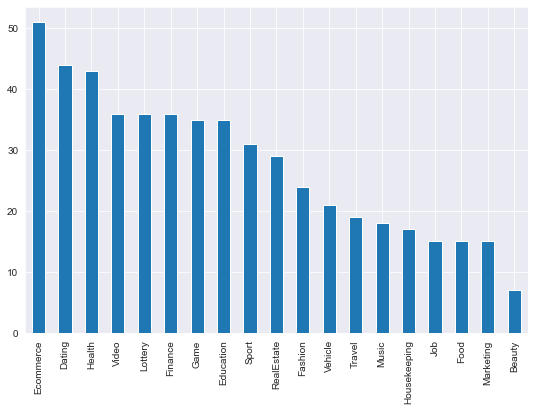

In [35]:
valid_df[(valid_df.pred==18) & (valid_df.class_label != 18)].class_name.value_counts().plot(kind='bar')

In [38]:
sub_df = valid_df[(valid_df.pred==18) & (valid_df.class_label != 18)]

In [40]:
df[df.class_label==18]

query_id                                        query  class_label  \
2         39016                                google camera           18   
75        20249                             cách xóa nick fb           18   
95        13468           easeus partition master full crack           18   
219       22420                      giờ làm việc hành chính           18   
227       47557                            game lords mobile           18   
...         ...                                          ...          ...   
46237     35836                                    mini word           18   
46287     39447                                    tải mario           18   
46322     29468  produced by an autodesk educational product           18   
46323     37486                                  nox giả lập           18   
46330     35822                            download zing mp3           18   

      class_name  
2      Technical  
75     Technical  
95     Technical  
219    Technical  
227    Technical  
...          ...  
46237  Technical  
46287  Technical  
46322  Technical  
46323  Technical  
46330  Technical  

[1993 rows x 4 columns]

In [39]:
sub_df

query_id                                              query  \
8617      18553                                             shbank   
19359     57319                                             ladaza   
32467     45448                                       học phí acet   
27674     31211                   cách tải free fire tren may tinh   
20570     39383                                    100012961036987   
...         ...                                                ...   
5536      47548  bài thu hoạch nghị quyết trung ương 8 khóa 12 ...   
27389     24741                                         giaycaonam   
40240     24163                                        guaifenesin   
39540     30410                              benhviendakhoahagiang   
17960     34464                               đọc sách online free   

       class_label    class_name  pred  
8617             6       Finance    18  
19359            1     Ecommerce    18  
32467            4  Housekeeping    18  
27674            5         Video    18  
20570           14        Dating    18  
...            ...           ...   ...  
5536             0     Education    18  
27389            3       Fashion    18  
40240           10        Health    18  
39540           10        Health    18  
17960            1     Ecommerce    18  

[527 rows x 5 columns]

In [84]:
query_df = pd.read_csv('ds/train_serp.csv', sep = '|')
query_df.columns = [i.lower().replace(" ",'_') for i in query_df.columns]

In [ ]:
query_df.head()

In [ ]:
full_query_df = []
for i in range(1,4):
    sub_query_df = query_df[['query_id',f'title_{i}',f'content_{i}']].copy()
    sub_query_df.columns = ['query_id','title','content']
    sub_query_df['top_query'] = i
    full_query_df.append(sub_query_df)
full_query_df = pd.concat(full_query_df, ignore_index=True)

In [ ]:
df = pd.merge(df, full_query_df, on='query_id')

In [ ]:
(df.isna().sum()/df.shape[0]).plot(kind='bar')
plt.xticks(rotation=45)
plt.title("NaN pct by column")
plt.show()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.title.str.count('<b>')

In [ ]:
## Cleaning dataset
for col in ['title','content']:
    df[f'{col}_num_bolds'] = df[col].str.count('<b>')
    # HTML TAG REMOVAL
    df[col] = df[col].str.replace(r'<[^>]+>','')
    # QUOTE REMOVAL
    df[col] = df[col].str.replace("&quot;",'')
    
        

In [ ]:
df.head()

In [ ]:
df['query_num_tokens'] = df['query'].map(lambda x: len(ViTokenizer.tokenize(x).split()))

In [ ]:
df.plot(kind='scatter',x='title_num_bolds', y = 'content_num_bolds')

In [ ]:
df.plot(kind='scatter',x='query_num_tokens', y = 'content_num_bolds')

In [ ]:
df['coverage_ratio'] = df.query_num_tokens/df.content_num_bolds

In [ ]:
df.groupby('title').class_name.nunique().sort_values()

In [ ]:
df[df.title=='Tin nhanh VnExpress']

In [ ]:
df.head()

In [ ]:
pd.concat([df.title_1, df.title_2, df.title_3]).str.len().plot(kind='box')
plt.show()

In [ ]:
pd.concat([df.title_1, df.title_2, df.title_3]).str.len().hist()
plt.show('Title len distribution')

### Nhận xét: Len title Có outliers, ko đưa nhận xét về phân bố

In [ ]:
from pyvi import ViTokenizer

In [ ]:
num_tokens_per_title = pd.concat([df.title_1, df.title_2, df.title_3]).map(lambda x: len(ViTokenizer.tokenize(x).split()))
num_tokens_per_title.plot(kind='box')
plt.show()

In [ ]:
num_tokens_per_title.hist()
plt.show()

### Nhận xét: Num Tokens per title phân bố khá đẹp , tập trung dưới 25 tokens/title

In [ ]:
ViTokenizer.tokenize(query_df.title_1.iloc[0])

In [ ]:
num_char_per_content = pd.concat([df.content_1, df.content_2, df.content_3]).str.len()
num_char_per_content.plot(kind='box')
plt.show()

In [ ]:
num_tokens_per_content = pd.concat([df.content_1, df.content_2, df.content_3]).map(lambda x: len(ViTokenizer.tokenize(x).split()))
num_tokens_per_content.plot(kind='box')
plt.show()

In [ ]:
num_tokens_per_content.describe()

In [ ]:
num_tokens_per_content.hist()

In [ ]:
num_char_per_content.describe()

In [ ]:
df['full_text'] = df['query'] + ' ' + df.title_1 + ' ' + df.title_2 + ' ' + df.title_3 + ' ' + df.content_1 + ' ' + df.content_2 + ' ' + df.content_3

## Fasttext with full text data


In [ ]:
train_df, valid_df = train_test_split(df, test_size=0.2, stratify=df.class_label)

In [ ]:
train_path = create_fasttext_ds(train_df, 'train')
valid_path = create_fasttext_ds(valid_df, 'valid')

In [ ]:
model = fasttext.train_supervised(input=train_path)

In [ ]:
model.test(train_path)

## TF-IDF to vectorize

In [ ]:
a

In [ ]:
train_df['class_name'].value_counts().plot(kind='bar')
plt.title('#instances distribution by label category')
plt.show()


In [ ]:
for cat in train_df.class_name.unique():
    
    print(f"Category {cat}".upper())
    print('\n'.join(train_df[train_df.class_name==cat].sample(5)['query'].tolist()))
    print('*'*10+ '\n\n')

In [ ]:
query_result_df = pd.read_csv("ds/train_serp.csv", sep='|')

In [ ]:
query_result_df.columns = [i.lower().replace(" ",'_') for i in query_result_df.columns]

In [ ]:
query_result_df.head()

In [ ]:
import re

In [ ]:
data = 'Ác Quỷ Ma Sơ-<b>The</b> <b>Nun</b> (2018) [Ful'

In [ ]:
def clean_text(data):
    # Clean html tag
    data = re.sub(,'',data)
    
    # Clean quotes
    data = data.replace("&quot;",'')
    return data

In [ ]:
train_df.iloc[2]

In [ ]:
query_result_df.content_1

In [ ]:
clean_text(data)